 Dams.csv
 HA.csv


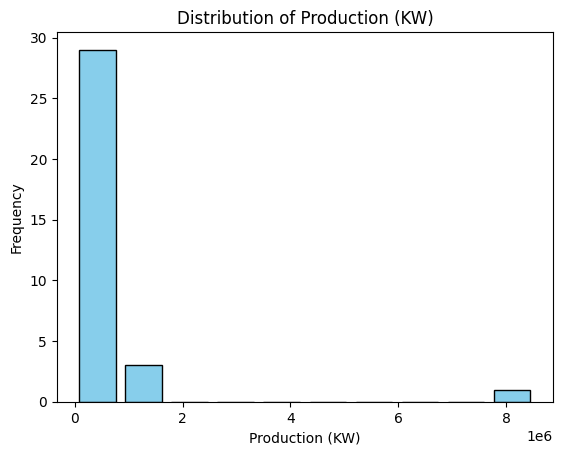

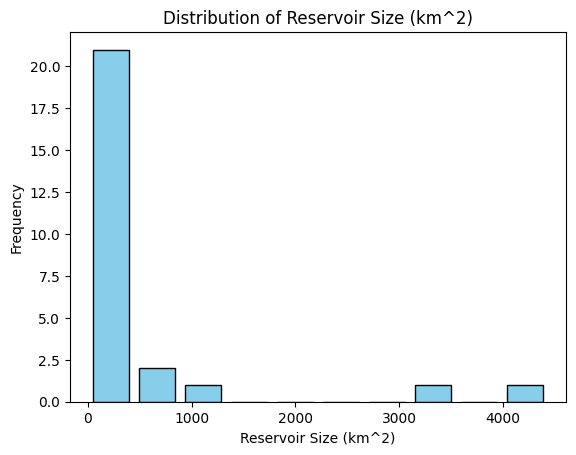

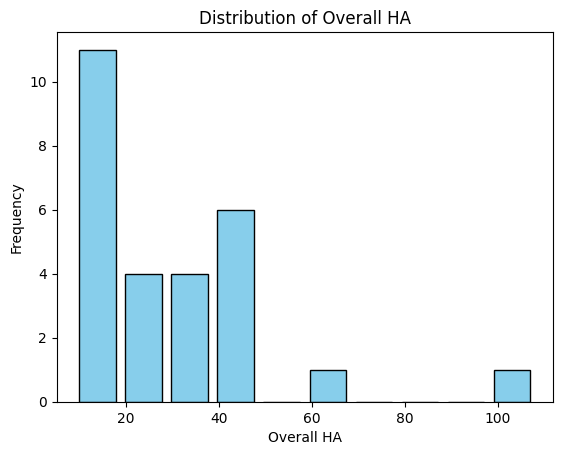

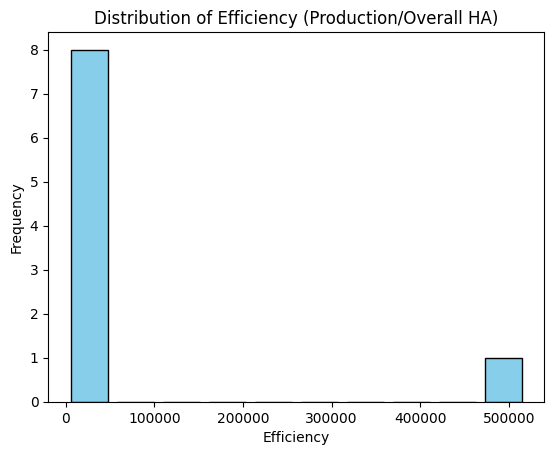

Pearson: 0.4856848948608507, Spearman: 0.08571428571428573
y = 53.054x + 8442.622 : R2 = 0.236


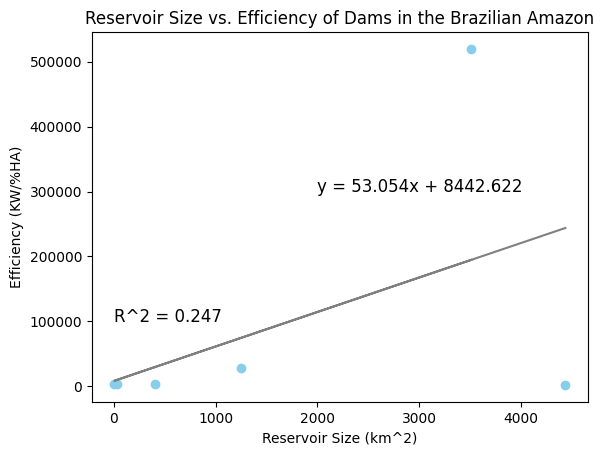

y = 872.676x + 342909.637 : R2 = 0.247


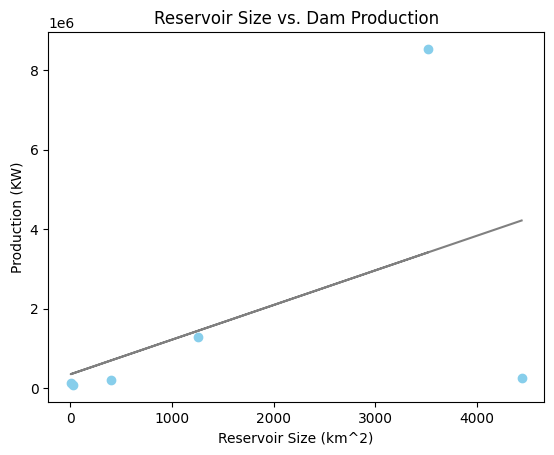

y = 0.01x + 29.645 : R2 = 0.313


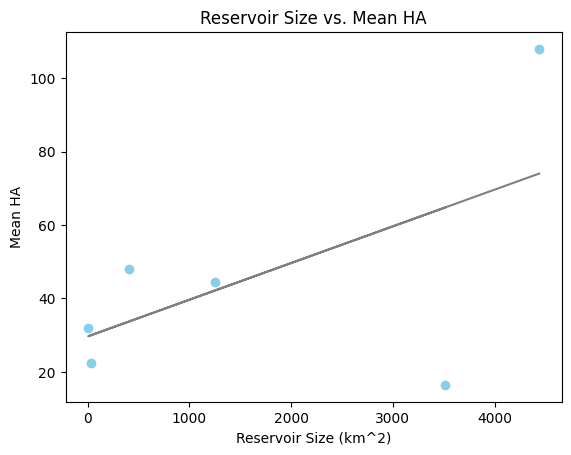

    Lat.(deg.)  Lon.(deg.)  Elevation(masl)  Production(KW)  \
2       -1.915     -59.473             32.0        249750.0   
6        0.904     -51.259             47.0         76952.0   
13     -15.123     -58.964            482.0        124200.0   
20     -14.874     -55.785            268.0        210900.0   
31     -13.835     -48.301            451.0       1275000.0   
32      -3.832     -49.652             55.0       8535000.0   

    ReservoirSize (km^{2} )  ConstructionStart Year  Reservoir FillStart Year  \
2                    4438.0                  1977.0                    1987.0   
6                      30.0                  1967.0                    1975.0   
13                      5.0                  2001.0                    2002.0   
20                    402.0                  1988.0                    2000.0   
31                   1254.0                  1986.0                    1996.0   
32                   3513.0                  1975.0                    1

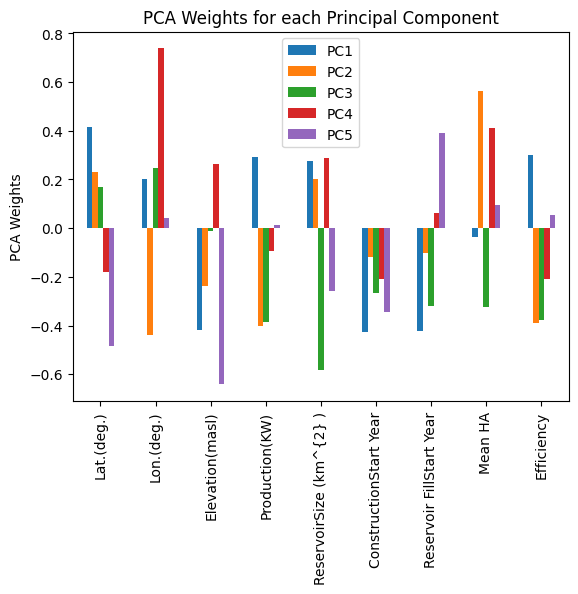

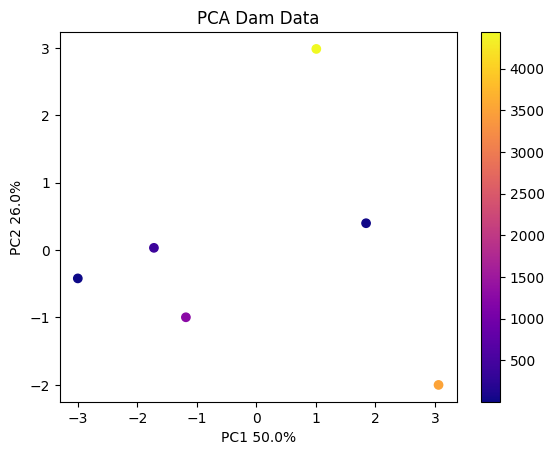

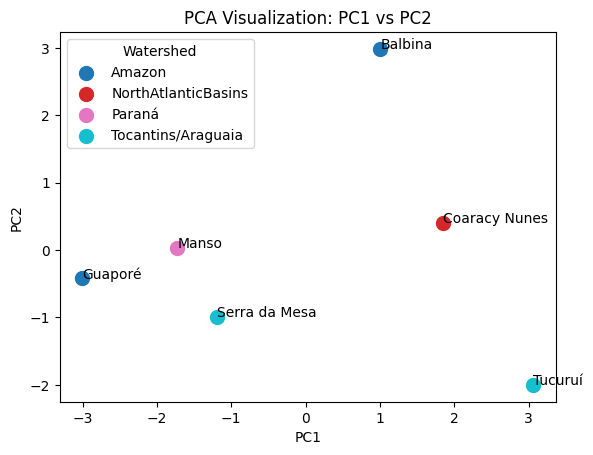

In [4]:
#Importing all necessary libraries: pandas, numpy, matplotlib, and scipy.

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#You must insert the csv of dam data FIRST, and then the csv for HAs by dam/station. It will not work if you do not do it in that order.
filename_dams = input()
filename_has = input()

fileha = open(filename_has)
filedam = open(filename_dams)

dams_df = pd.read_csv(filedam, encoding="utf-8-sig")
has_df = pd.read_csv(fileha, encoding="utf-8-sig")
dams_df.columns = dams_df.columns.str.replace("\n", "", regex=False).str.strip()
has_df.columns = has_df.columns.str.replace("\n", "", regex=False).str.strip()
dams_df = dams_df.replace("\n", "", regex=True)
dams_df = dams_df.map(lambda x: x.strip() if isinstance(x, str) else x)
dams_df["ReservoirSize (km^{2} )"] = (pd.to_numeric(dams_df["ReservoirSize (km^{2} )"].astype(str).str.replace(",", "").str.strip(),
                  errors="coerce"))

ha_by_dam = has_df.groupby("Dam Name")["Overall HA"].mean().reset_index().rename(columns={"Overall HA":"Mean HA"})

dams_merged = dams_df.merge(ha_by_dam, on="Dam Name", how="left")

dams_merged["Efficiency"] = dams_merged["Production(KW)"] / dams_merged["Mean HA"]


#Part 1.1. Means, medians, and standard deviations of all relevant variables.

power_mean = dams_df["Production(KW)"].mean()
size_mean = dams_df["ReservoirSize (km^{2} )"].mean()
ha_mean = has_df["Overall HA"].mean()
eff_mean = dams_merged["Efficiency"].mean()

#The means of all relevant variables (production (KW), reservoir size (km^2), overall HA, and efficiency (KW/%HA)) are 44,632.909 KW, 443.077 km^2, 29.963%, and 62,625.833, respectively. Note this is not for the grouped data but is instead for overall data.

power_median = dams_df["Production(KW)"].median()
size_median = dams_df["ReservoirSize (km^{2} )"].median()
ha_median = has_df["Overall HA"].median()
eff_median = dams_merged["Efficiency"].median()

#The medians of all relevant variables (production (KW), reservoir size (km^2), overall HA, and efficiency (KW/%HA)) are 42,000 KW, 5.5 km^2, 25%, and 3445.612, respectively.

power_std = dams_df["Production(KW)"].std()
size_std = dams_df["ReservoirSize (km^{2} )"].std()
ha_std = has_df["Overall HA"].std()
eff_std = dams_merged["Efficiency"].std()

#The standard deviations of all relevant variables (production (KW), reservoir size (km^2), overall HA, and efficiency (KW/%HA)) are 1,486,161.558 KW, 1088.124 km^2, 21.118%, and 171,565.612, respectively.

plt.figure()
ax = dams_df["Production(KW)"].hist(bins=10, grid=False, color="skyblue", edgecolor="black", rwidth=0.8)
ax.set_title("Distribution of Production (KW)")
ax.set_xlabel("Production (KW)")
ax.set_ylabel("Frequency")

#Part 1.2. Constructing histograms of all relevant variables.

plt.figure()
ax = dams_df["ReservoirSize (km^{2} )"].hist(bins=10, grid=False, color="skyblue", edgecolor="black", rwidth=0.8)
ax.set_title("Distribution of Reservoir Size (km^2)")
ax.set_xlabel("Reservoir Size (km^2)")
ax.set_ylabel("Frequency")

plt.figure()
ax = has_df["Overall HA"].hist(bins=10, grid=False, color="skyblue", edgecolor="black", rwidth=0.8)
ax.set_title("Distribution of Overall HA")
ax.set_xlabel("Overall HA")
ax.set_ylabel("Frequency")

plt.figure()
ax = dams_merged["Efficiency"].hist(bins=10, grid=False, color="skyblue", edgecolor="black", rwidth=0.8)
ax.set_title("Distribution of Efficiency (Production/Overall HA)")
ax.set_xlabel("Efficiency")
ax.set_ylabel("Frequency")

plt.show()

#Part 2.1. Pearson and Spearman coefficients for Reservoir Size vs Efficiency.

fixed_dams = dams_merged.replace([np.inf, -np.inf], np.nan).dropna(subset=["ReservoirSize (km^{2} )", "Efficiency"])
pearson = fixed_dams["ReservoirSize (km^{2} )"].corr(fixed_dams["Efficiency"], method = "pearson")
spearman = fixed_dams["ReservoirSize (km^{2} )"].corr(fixed_dams["Efficiency"], method = "spearman")                                                 
print(f"Pearson: {pearson}, Spearman: {spearman}")

#Part 2.2. Linear regression.

LSLR = stats.linregress(fixed_dams["ReservoirSize (km^{2} )"], fixed_dams["Efficiency"]) 
print("y =", str(np.round(LSLR.slope, decimals=3)) + "x +", str(np.round(LSLR.intercept,decimals=3)), ": R2 = "+str(np.round(LSLR.rvalue**2,decimals=3)))

#Part 2.3. Scatter Plots
fig,ax = plt.subplots()

x = fixed_dams["ReservoirSize (km^{2} )"]
y = fixed_dams["Efficiency"]

ax.scatter(x, y, color="skyblue")
ax.set_xlabel("Reservoir Size (km^2)")
ax.set_ylabel("Efficiency (KW/%HA)")
ax.set_title("Reservoir Size vs. Efficiency of Dams in the Brazilian Amazon")
plt.text(3, 100000, "R^2 = 0.247", fontsize = 12, color="black")
plt.text(2000, 300000, "y = 53.054x + 8442.622", fontsize = 12, color="black")
plt.plot(x, 53.054*x + 8442.622, color='gray', linestyle='solid', label='LSLR Line')
plt.show()

x = fixed_dams["ReservoirSize (km^{2} )"] 
y = fixed_dams["Production(KW)"]

LSLR = stats.linregress(fixed_dams["ReservoirSize (km^{2} )"], fixed_dams["Production(KW)"]) 
print("y =", str(np.round(LSLR.slope, decimals=3)) + "x +", str(np.round(LSLR.intercept,decimals=3)), ": R2 = "+str(np.round(LSLR.rvalue**2,decimals=3)))

fig,ax = plt.subplots()
ax.scatter(x, y, color="skyblue")
ax.set_xlabel("Reservoir Size (km^2)")
ax.set_ylabel("Production (KW)")
ax.set_title("Reservoir Size vs. Dam Production")
plt.plot(x, 872.676*x + 342909.637, color='gray', linestyle='solid', label='LSLR Line')
plt.show()

LSLR = stats.linregress(fixed_dams["ReservoirSize (km^{2} )"], fixed_dams["Mean HA"]) 
print("y =", str(np.round(LSLR.slope, decimals=3)) + "x +", str(np.round(LSLR.intercept,decimals=3)), ": R2 = "+str(np.round
                                                                                                                    (LSLR.rvalue**2,decimals=3)))

x = fixed_dams["ReservoirSize (km^{2} )"] 
y = fixed_dams["Mean HA"]

fig,ax = plt.subplots()
ax.scatter(x, y, color="skyblue")
ax.set_xlabel("Reservoir Size (km^2)")
ax.set_ylabel("Mean HA")
ax.set_title("Reservoir Size vs. Mean HA")
plt.plot(x, 0.01*x + 29.645, color='gray', linestyle='solid', label='LSLR Line')
plt.show()

#Part 3.1. Conducting PCA.

quant_dams = fixed_dams.select_dtypes(include="number").copy()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(quant_dams)

pca = PCA(n_components=0.99) 
print(quant_dams)
PCs = pca.fit_transform(scaled_data)
print(pca.explained_variance_ratio_)
print(pca.components_)
pc1pct = str(np.round(pca.explained_variance_ratio_[0]*100))+"%"
print(pc1pct)
pc2pct = str(np.round(pca.explained_variance_ratio_[1]*100))+"%"
print(pc2pct)

#Part 3.2. PCA Weights and Bar Chart

num_components = pca.components_.shape[0]

weights = pd.DataFrame(pca.components_.T, index=quant_dams.columns, columns=[f"PC{i+1}" for i in range(num_components)])
weights.plot(kind="bar")
plt.ylabel("PCA Weights")
plt.title("PCA Weights for each Principal Component")
plt.show()


#Part 3.3. Plotting PCA
fig,ax = plt.subplots()
ax.set_xlabel("PC1 " + pc1pct)
ax.set_ylabel("PC2 " + pc2pct)
ax.set_title('PCA Dam Data')
plt.scatter(PCs[:, 0], PCs[:, 1], c=fixed_dams["ReservoirSize (km^{2} )"], cmap="plasma")
plt.colorbar()
plt.show()

category = "Watershed"
PC1 = PCs[:, 0]
PC2 = PCs[:, 1]
categories = fixed_dams[category].values

unique_cats = np.unique(categories)

colors = plt.cm.tab10(np.linspace(0, 1, len(unique_cats)))

plt.figure()

for cat, color in zip(unique_cats, colors):
    mask = categories == cat
    plt.scatter(PC1[mask], PC2[mask], label=cat, s=100, color=color)

for i in range(len(fixed_dams)):
    plt.text(PC1[i], PC2[i], fixed_dams["Dam Name"].iloc[i])
    

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization: PC1 vs PC2")
plt.legend(title=category)
plt.show()
